# INTRODUCTION & BACKGROUND

### Overview

### Research Question

Can environmental factors like socioeconomic status and education level be used to predict Alzheimer's Disease?

### Hypothesis

We predict that environmental factors do not play a significant role in the diagnosis of AD

## DATASETS 

This set consists of a cross-sectional collection of 416 subjects aged 18 to 96. For each subject, 3 or 4 individual T1-weighted MRI scans obtained in single scan sessions are included. The subjects are all right-handed and include both men and women. 100 of the included subjects over the age of 60 have been clinically diagnosed with very mild to moderate Alzheimer’s disease (AD). Additionally, a reliability data set is included containing 20 nondemented subjects imaged on a subsequent visit within 90 days of their initial session.

Link to the dataset: https://www.kaggle.com/jboysen/mri-and-alzheimers
<br>
Number of observations: 436
<br>
Number of variables (pre-cleaning): 12

### Variables

Gender:

- For this dataset, gender is categorized into two: Male and Female

Hand:

- The dominant hand of the subject (All of the subjects were right handed, so we are going to drop that column)

Age:

- Age of the subject in years

Educ:

- Education codes correspond to the following levels of education: 1: less than high school grad., 2:
high school grad., 3: some college, 4: college grad., 5: beyond college. 

SES:

- Socioeconomic Status (ranged from 1 to 4)

MMSE:

- Mini Mental State Examination

CDR:

- Clinical Dementia Rating (CDR; 0=
nondemented; 0.5 – very mild dementia; 1 = mild dementia; 2 = moderate dementia). All
participants with dementia (CDR >0) were diagnosed with probable AD

Alz:

- If the subject was diagnosed with probable AD (1 = Yes; 0 = No)

eTIV:

- Estimated total Intracranial Volume

nWBV:

- Normalized Whole Brain Volume

ASF:

- Atlas Scaling Factor


### Setup

In [190]:
!pip install plotly

In [191]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as pyo
from matplotlib.pyplot import figure
import numpy as np
from IPython.display import display
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_fscore_support
from sklearn.preprocessing import OneHotEncoder



In [192]:
df_cross = pd.read_csv('oasis_cross-sectional.csv')

In [193]:
df_cross


,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
431,OAS1_0285_MR2,M,R,20,NaN,NaN,NaN,NaN,1469,0.847,1.195,2.0
432,OAS1_0353_MR2,M,R,22,NaN,NaN,NaN,NaN,1684,0.790,1.042,40.0
433,OAS1_0368_MR2,M,R,22,NaN,NaN,NaN,NaN,1580,0.856,1.111,89.0
434,OAS1_0379_MR2,F,R,20,NaN,NaN,NaN,NaN,1262,0.861,1.390,2.0


## Data Cleaning

As seen above, there are some missing values. We are going to drop or replace these values. First, we determine which columns have missing data.

In [194]:
#determine which columns have missing data

print(df_cross.isna().sum())


ID         0
M/F        0
Hand       0
Age        0
Educ     201
SES      220
MMSE     201
CDR      201
eTIV       0
nWBV       0
ASF        0
Delay    416
dtype: int64


In [195]:
#drop the delay and ID column from df_cross

df_cross.drop(['Delay', 'ID' , 'Hand'], axis = 1, inplace = True)
df_cross


,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
0,F,74,2.0,3.0,29.0,0.0,1344,0.743,1.306
1,F,55,4.0,1.0,29.0,0.0,1147,0.810,1.531
2,F,73,4.0,3.0,27.0,0.5,1454,0.708,1.207
3,M,28,NaN,NaN,NaN,NaN,1588,0.803,1.105
4,M,18,NaN,NaN,NaN,NaN,1737,0.848,1.010
...,...,...,...,...,...,...,...,...,...
431,M,20,NaN,NaN,NaN,NaN,1469,0.847,1.195
432,M,22,NaN,NaN,NaN,NaN,1684,0.790,1.042
433,M,22,NaN,NaN,NaN,NaN,1580,0.856,1.111
434,F,20,NaN,NaN,NaN,NaN,1262,0.861,1.390


We dropped the "Delay", "Hand", and "ID" columns. The "Delay" column had 416 missing values (almost as much as the total number of observations), so we decided to drop it. All of the subjects are right handed, so that column is also dropped. Another thing that we have noticed was that, just by eyeballing, subjects with missing values tended to be younger than others. So, we have decided to see if that was the case **((REREAD AND WRITE THIS AGAIN))**

The average age is 26.82089552238806


Text(0.5, 1.0, 'Distribution of missing values based on subject age')

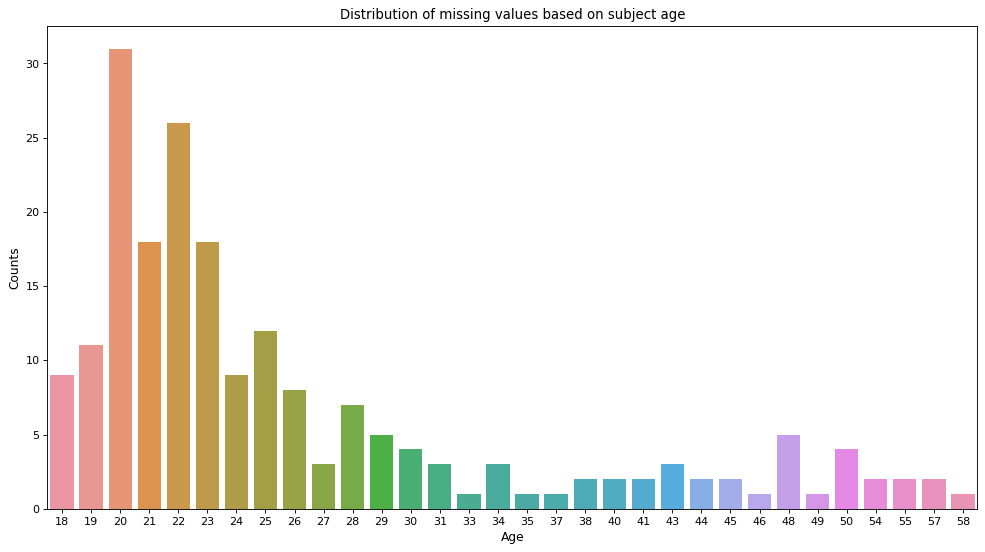

In [196]:
#Ages of subject's with missing values
nang = df_cross[df_cross['Educ'].isna() == True]['Age'].value_counts()

#Find the average age of subject's with missing values
total = 0
for idx, val in nang.iteritems():
    total = total + idx*val
m = total/sum(nang.values)
print('The average age is', m)


figure(figsize=(15, 8), dpi=80)

sns.barplot(x = nang.index, y = nang.values)
plt.xlabel('Age', fontsize = 11)
plt.ylabel('Counts', fontsize = 11)
plt.title('Distribution of missing values based on subject age')



As we can see above, most of the missing data belongs to relatively younger people. The average age is ~27. It is fair to assume that data is not missing at random. Therefore, we will drop these rows because they might cause bias in our analysis and model. For example, younger people are usually not diagnosed with Alzheimer's and also have low Educ, this could result in low educ = low alzheimers **REREAD**

In [197]:
#remove rows with missing values

df_cross = df_cross.dropna(axis = 0, how = 'any')
df_cross.reset_index(drop = True, inplace = True)
df_cross

,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
0,F,74,2.0,3.0,29.0,0.0,1344,0.743,1.306
1,F,55,4.0,1.0,29.0,0.0,1147,0.810,1.531
2,F,73,4.0,3.0,27.0,0.5,1454,0.708,1.207
3,M,74,5.0,2.0,30.0,0.0,1636,0.689,1.073
4,F,52,3.0,2.0,30.0,0.0,1321,0.827,1.329
...,...,...,...,...,...,...,...,...,...
211,F,70,1.0,4.0,29.0,0.5,1295,0.748,1.355
212,F,73,3.0,2.0,23.0,0.5,1536,0.730,1.142
213,F,61,2.0,4.0,28.0,0.0,1354,0.825,1.297
214,M,61,5.0,2.0,30.0,0.0,1637,0.780,1.072


In [198]:
#change column names
names_cross = ['Gender', 'Age', 'Educ', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']
df_cross.columns = names_cross


After dropping null values we ended up with 216 observations. Finally, we will standardize Gender. 1 for male and 0 for female

In [199]:
def standardize_gender(str_in):
    if str_in == 'M':
        return 1.0
    else:
        return 0.0


def convert_label(str_in):
    if str_in > 0.0:
        return 1
    elif str_in == 0.0:
        return 0
    else:
        return np.NaN


In [200]:
df_cross['Gender'] = df_cross['Gender'].apply(standardize_gender)
df_cross

C:\Users\poggers\AppData\Local\Temp/ipykernel_18080/2953059599.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Gender,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0.0,74,2.0,3.0,29.0,0.0,1344,0.743,1.306
1,0.0,55,4.0,1.0,29.0,0.0,1147,0.810,1.531
2,0.0,73,4.0,3.0,27.0,0.5,1454,0.708,1.207
3,1.0,74,5.0,2.0,30.0,0.0,1636,0.689,1.073
4,0.0,52,3.0,2.0,30.0,0.0,1321,0.827,1.329
...,...,...,...,...,...,...,...,...,...
211,0.0,70,1.0,4.0,29.0,0.5,1295,0.748,1.355
212,0.0,73,3.0,2.0,23.0,0.5,1536,0.730,1.142
213,0.0,61,2.0,4.0,28.0,0.0,1354,0.825,1.297
214,1.0,61,5.0,2.0,30.0,0.0,1637,0.780,1.072


In [201]:
# add Alzheimer's Probable Column

df_cross['Alz'] = [convert_label(i) for i in df_cross['CDR']]
df_cross

C:\Users\poggers\AppData\Local\Temp/ipykernel_18080/3336560016.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Gender,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Alz
0,0.0,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,0
1,0.0,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,0
2,0.0,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,1
3,1.0,74,5.0,2.0,30.0,0.0,1636,0.689,1.073,0
4,0.0,52,3.0,2.0,30.0,0.0,1321,0.827,1.329,0
...,...,...,...,...,...,...,...,...,...,...
211,0.0,70,1.0,4.0,29.0,0.5,1295,0.748,1.355,1
212,0.0,73,3.0,2.0,23.0,0.5,1536,0.730,1.142,1
213,0.0,61,2.0,4.0,28.0,0.0,1354,0.825,1.297,0
214,1.0,61,5.0,2.0,30.0,0.0,1637,0.780,1.072,0


## Data Analysis

### Explatory Data Analysis

#### Univariate Analysis

Before diving into multivariate analysis, lets look at the univariate distributions! Lets look at the distributions of Gender, Educ, CDR, and SES.

C:\Users\poggers\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[Text(0, 0, 'Female'), Text(1, 0, 'Male')]

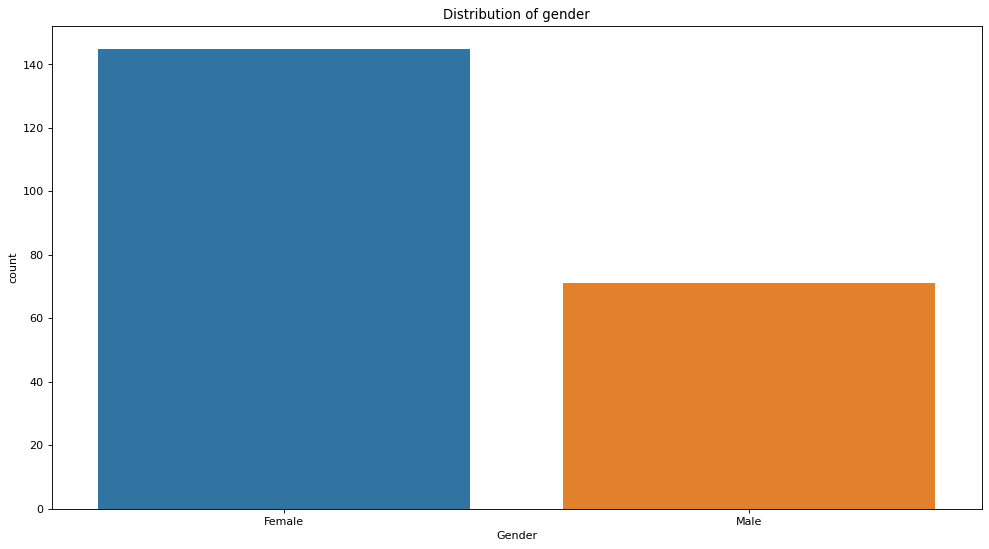

In [202]:

figure(figsize=(15, 8), dpi=80)
labels = ['Female', 'Male']
ax = plt.gca() # grab the current axis

sns.countplot(df_cross['Gender'])
plt.title('Distribution of gender')
ax.set_xticklabels(labels)

An important thing to note here is that the number of female subjects is significantly higher than male ones. We are going to keep this in mind while doing further analysis.

Text(0.5, 1.0, 'Distribution of Education Levels')

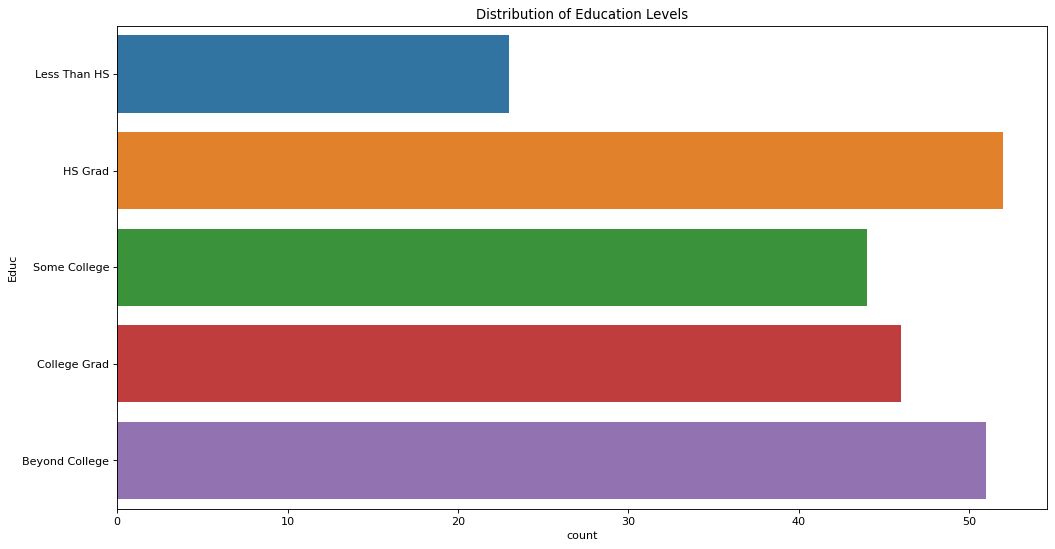

In [203]:
figure(figsize=(15, 8), dpi=80)
ax = plt.gca() # grab the current axis

sns.countplot(y = df_cross['Educ'])
ax.set_yticklabels(['Less Than HS', 'HS Grad', 'Some College', 'College Grad', 'Beyond College'])
plt.title('Distribution of Education Levels')

It looks like most of them have the same frequency except the people who were less than HS.

Text(0.5, 1.0, 'Distribution of CDR')

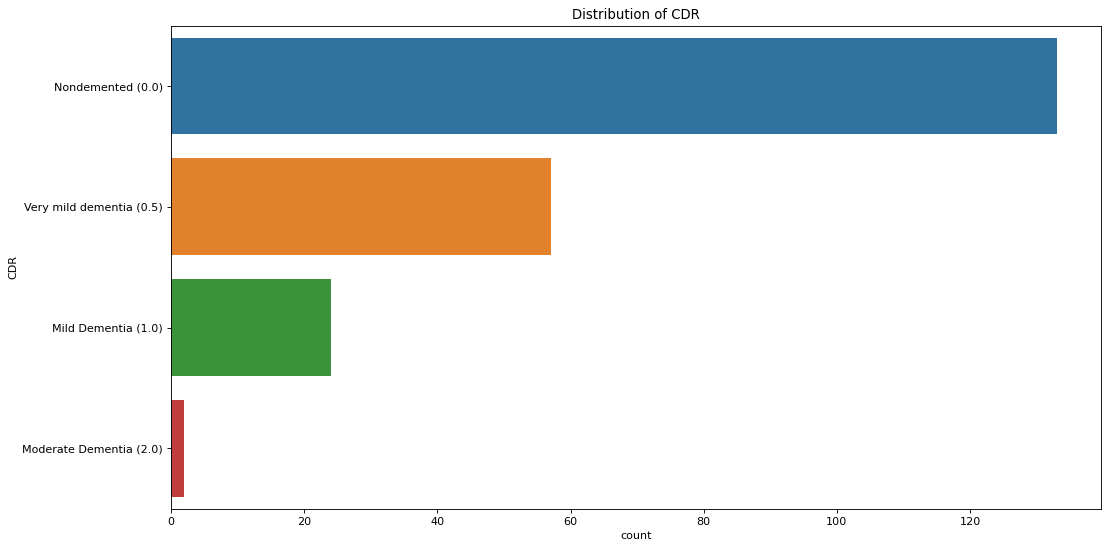

In [204]:
figure(figsize=(15, 8), dpi=80)
ax = plt.gca() # grab the current axis

sns.countplot(y = df_cross['CDR'])
ax.set_yticklabels(['Nondemented (0.0)', 'Very mild dementia (0.5)', 'Mild Dementia (1.0)', 'Moderate Dementia (2.0)'])
plt.title("Distribution of CDR")


As we can see, the number of nondemented individuals is much higher than the others. Also, the number of people who were diagnosed with moderate dementia is pretty small. They seem like outliers. We can confirm this by using a boxplot

C:\Users\poggers\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='CDR'>

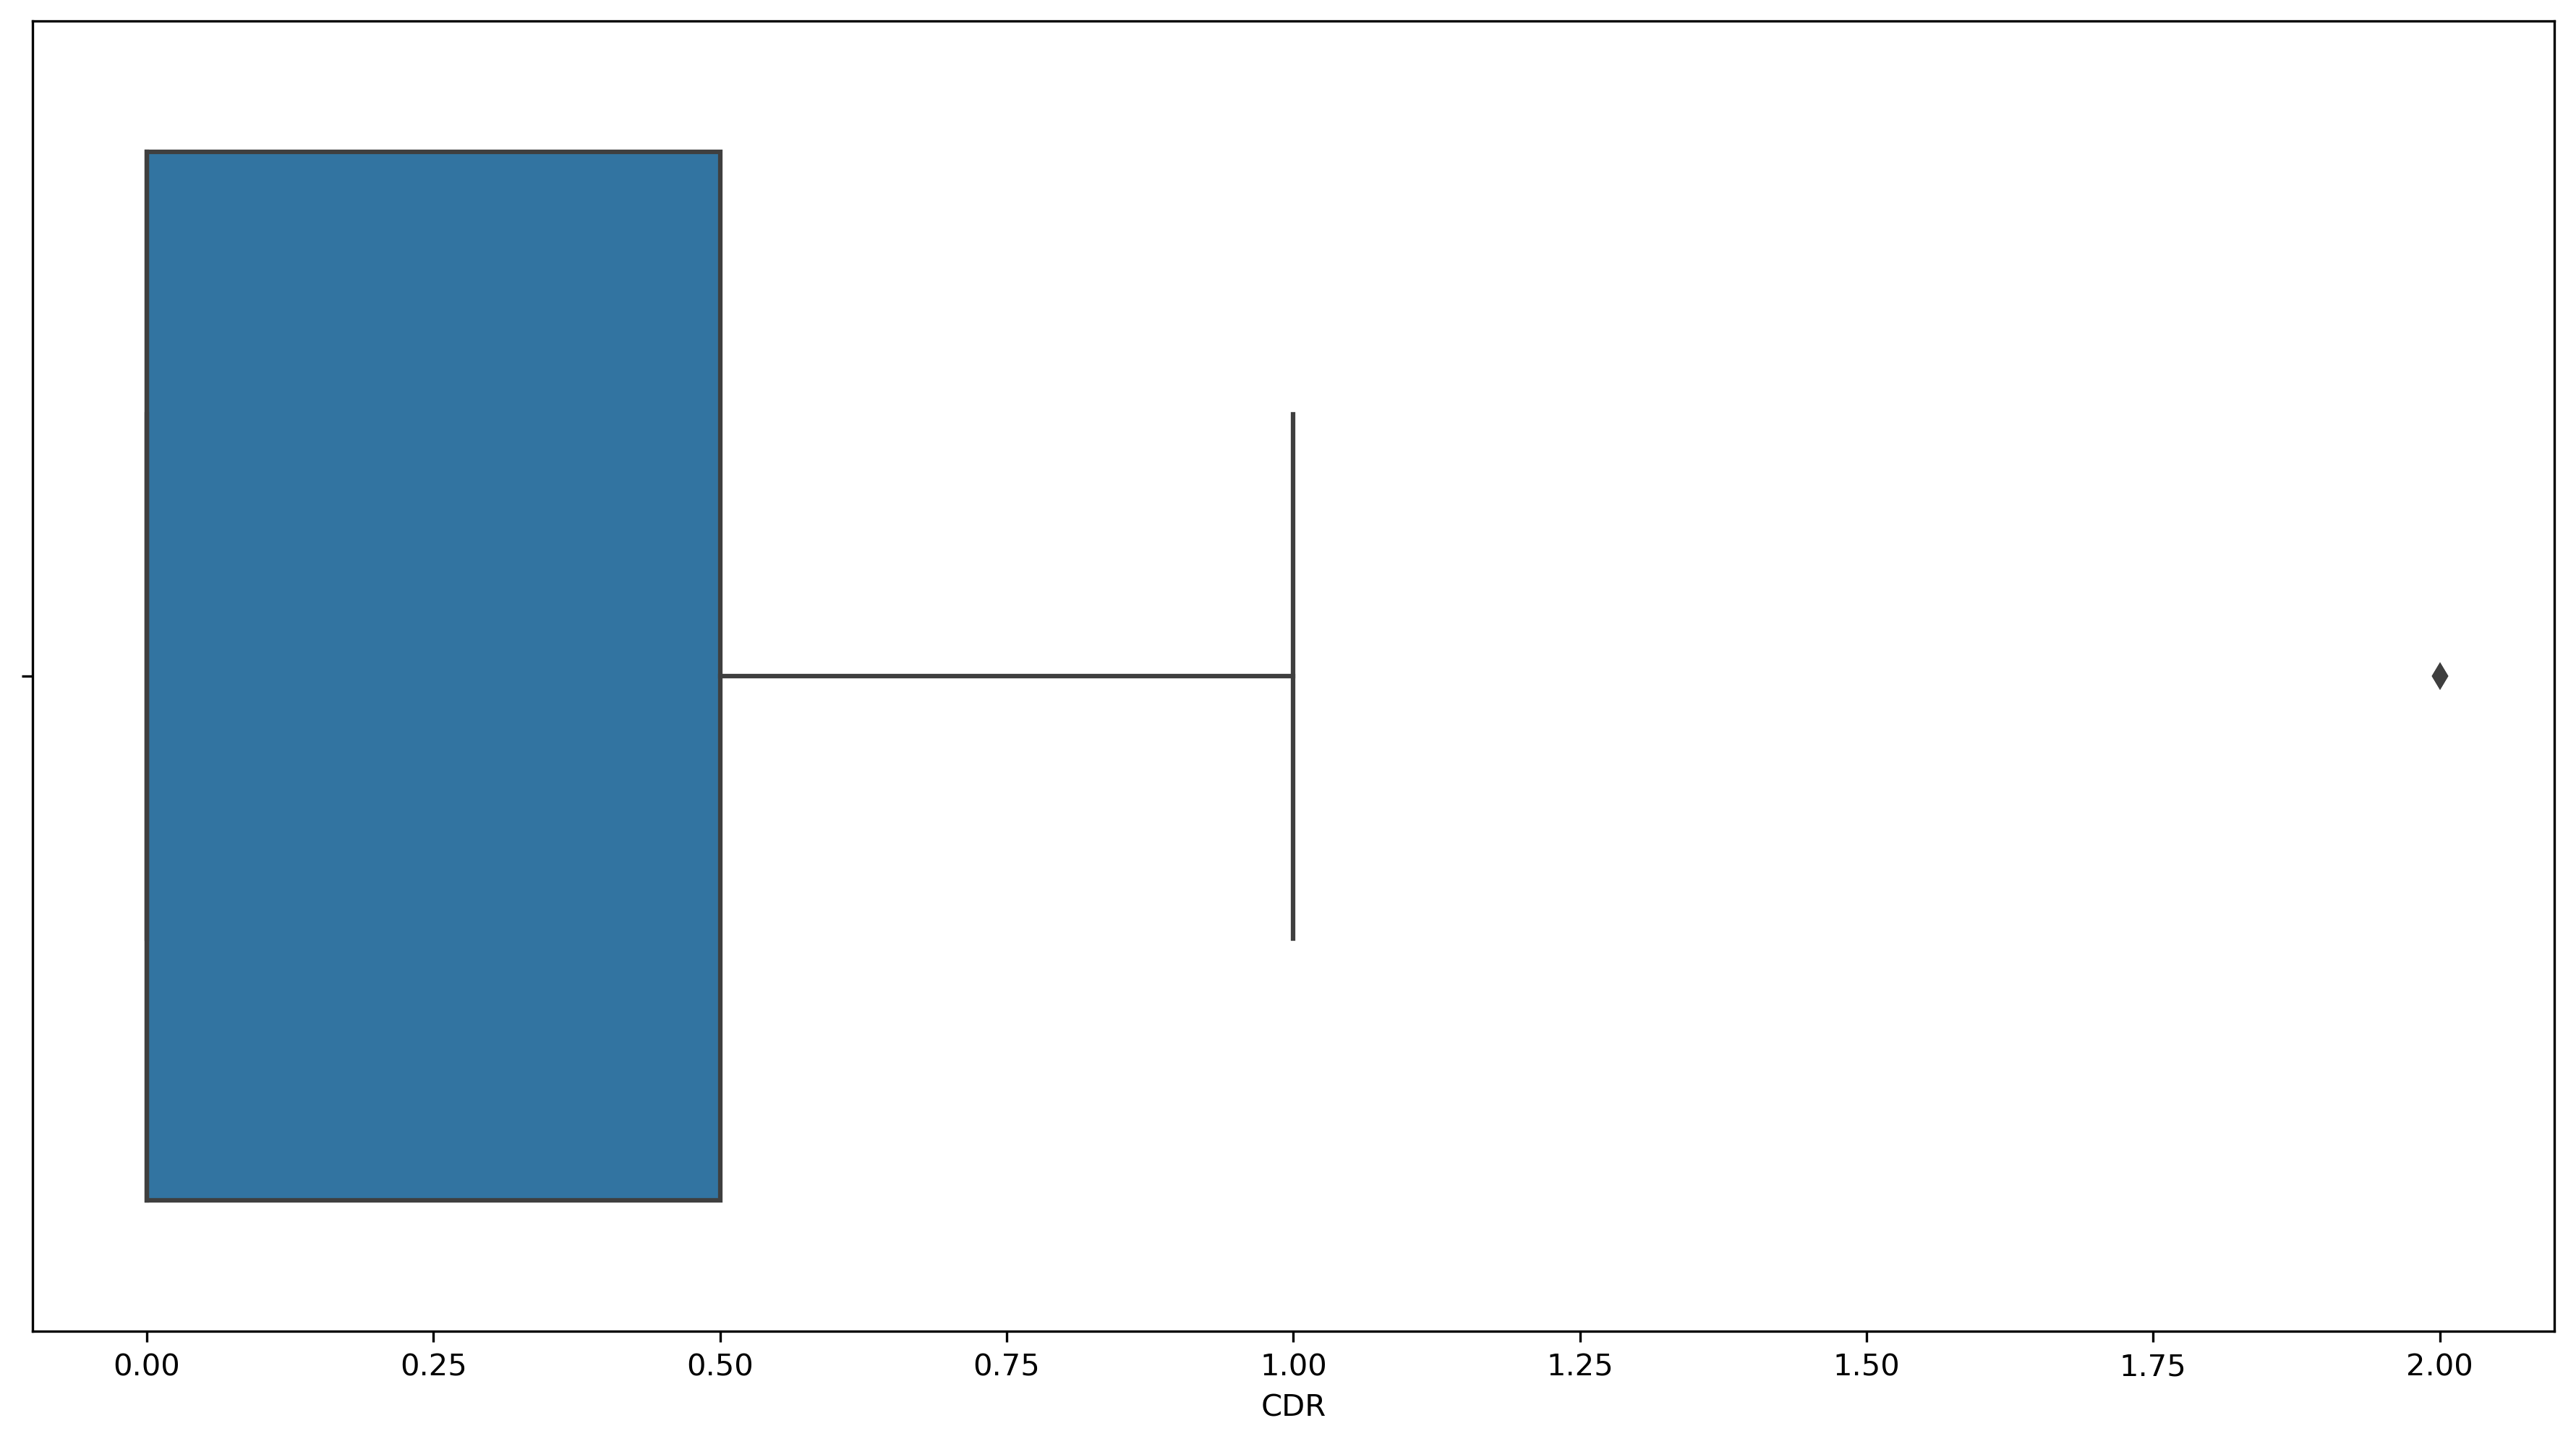

In [205]:

figure(figsize=(15, 8), dpi=300)
sns.boxplot(df_cross['CDR'])

As we can see, people with moderate dementia are outliers. We are also going to take a look at "Alzheimer Probable" distribution.

Text(0, 0.5, 'AD Probability')

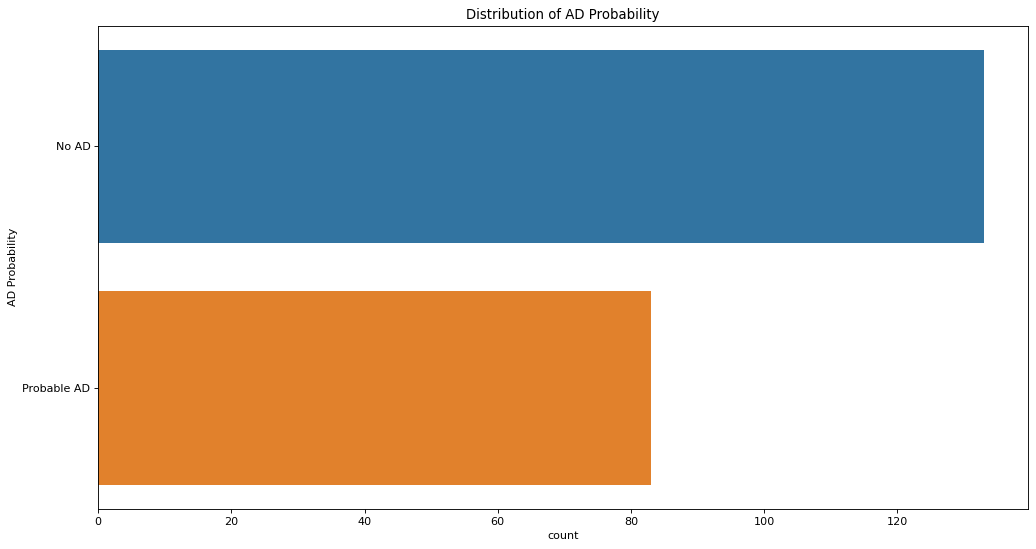

In [206]:
figure(figsize=(15, 8), dpi=80)
ax = plt.gca() # grab the current axis

sns.countplot(y = df_cross['Alz'])
ax.set_yticklabels(['No AD', 'Probable AD'])
plt.title("Distribution of AD Probability")
plt.ylabel('AD Probability')

<AxesSubplot:xlabel='count', ylabel='SES'>

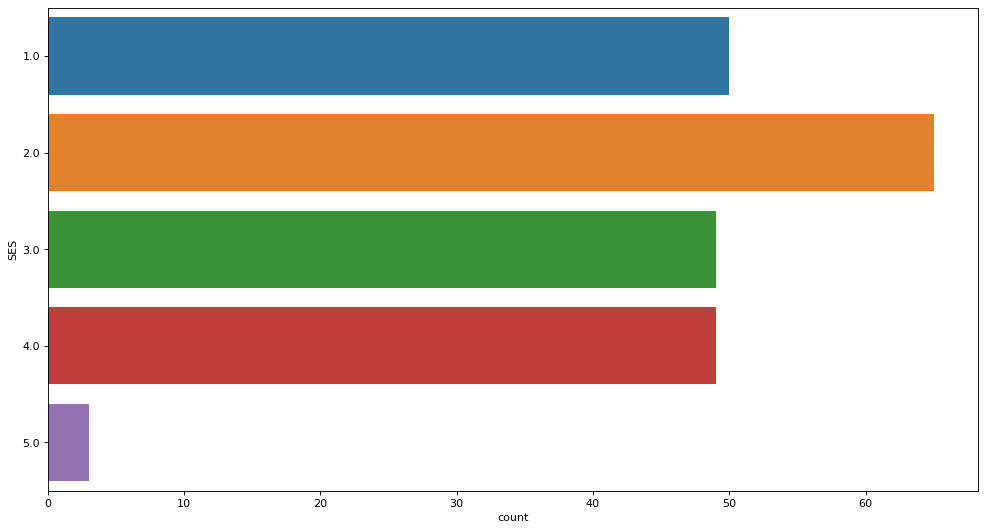

In [207]:
figure(figsize=(15, 8), dpi=80)
ax = plt.gca() # grab the current axis

sns.countplot(y = df_cross['SES'])

It looks like subjects who are on the highest end of the SES scale are outliers. We can confirm this by generating a boxplot.

C:\Users\poggers\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='SES'>

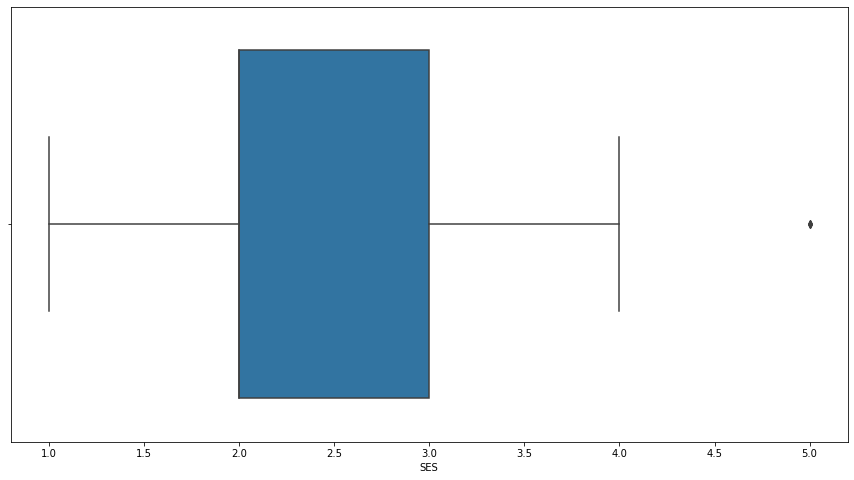

In [208]:
figure(figsize = (15,8))
sns.boxplot(df_cross['SES'])

An important thing to note here is that the number of rich people are small **bla lakansknsa**

<AxesSubplot:xlabel='Educ', ylabel='count'>

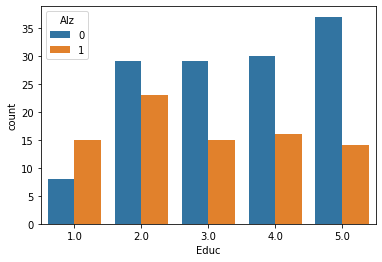

In [209]:
sns.countplot(data=df_cross, x = 'Educ', hue='Alz')

<AxesSubplot:xlabel='Educ', ylabel='proportion'>

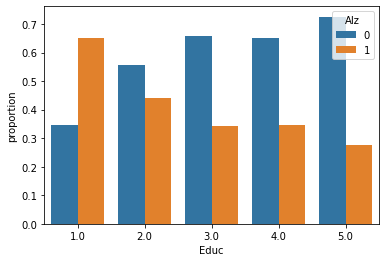

In [210]:
gender = df_cross.groupby('Educ')

df = gender['Alz'].value_counts(normalize=True).rename('proportion').to_frame().reset_index()
df
sns.barplot(data=df,x='Educ',y='proportion',hue='Alz')


<AxesSubplot:xlabel='ASF'>

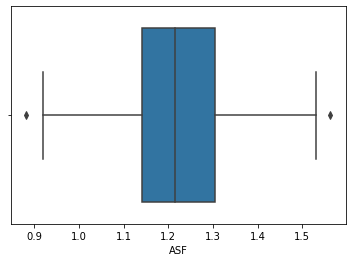

In [211]:
sns.boxplot(data=df_cross,x='ASF')

THIS FOR MULTI NAG

#### Multivariate Analysis

Now, lets see if there any pairwise relationships between our variables.

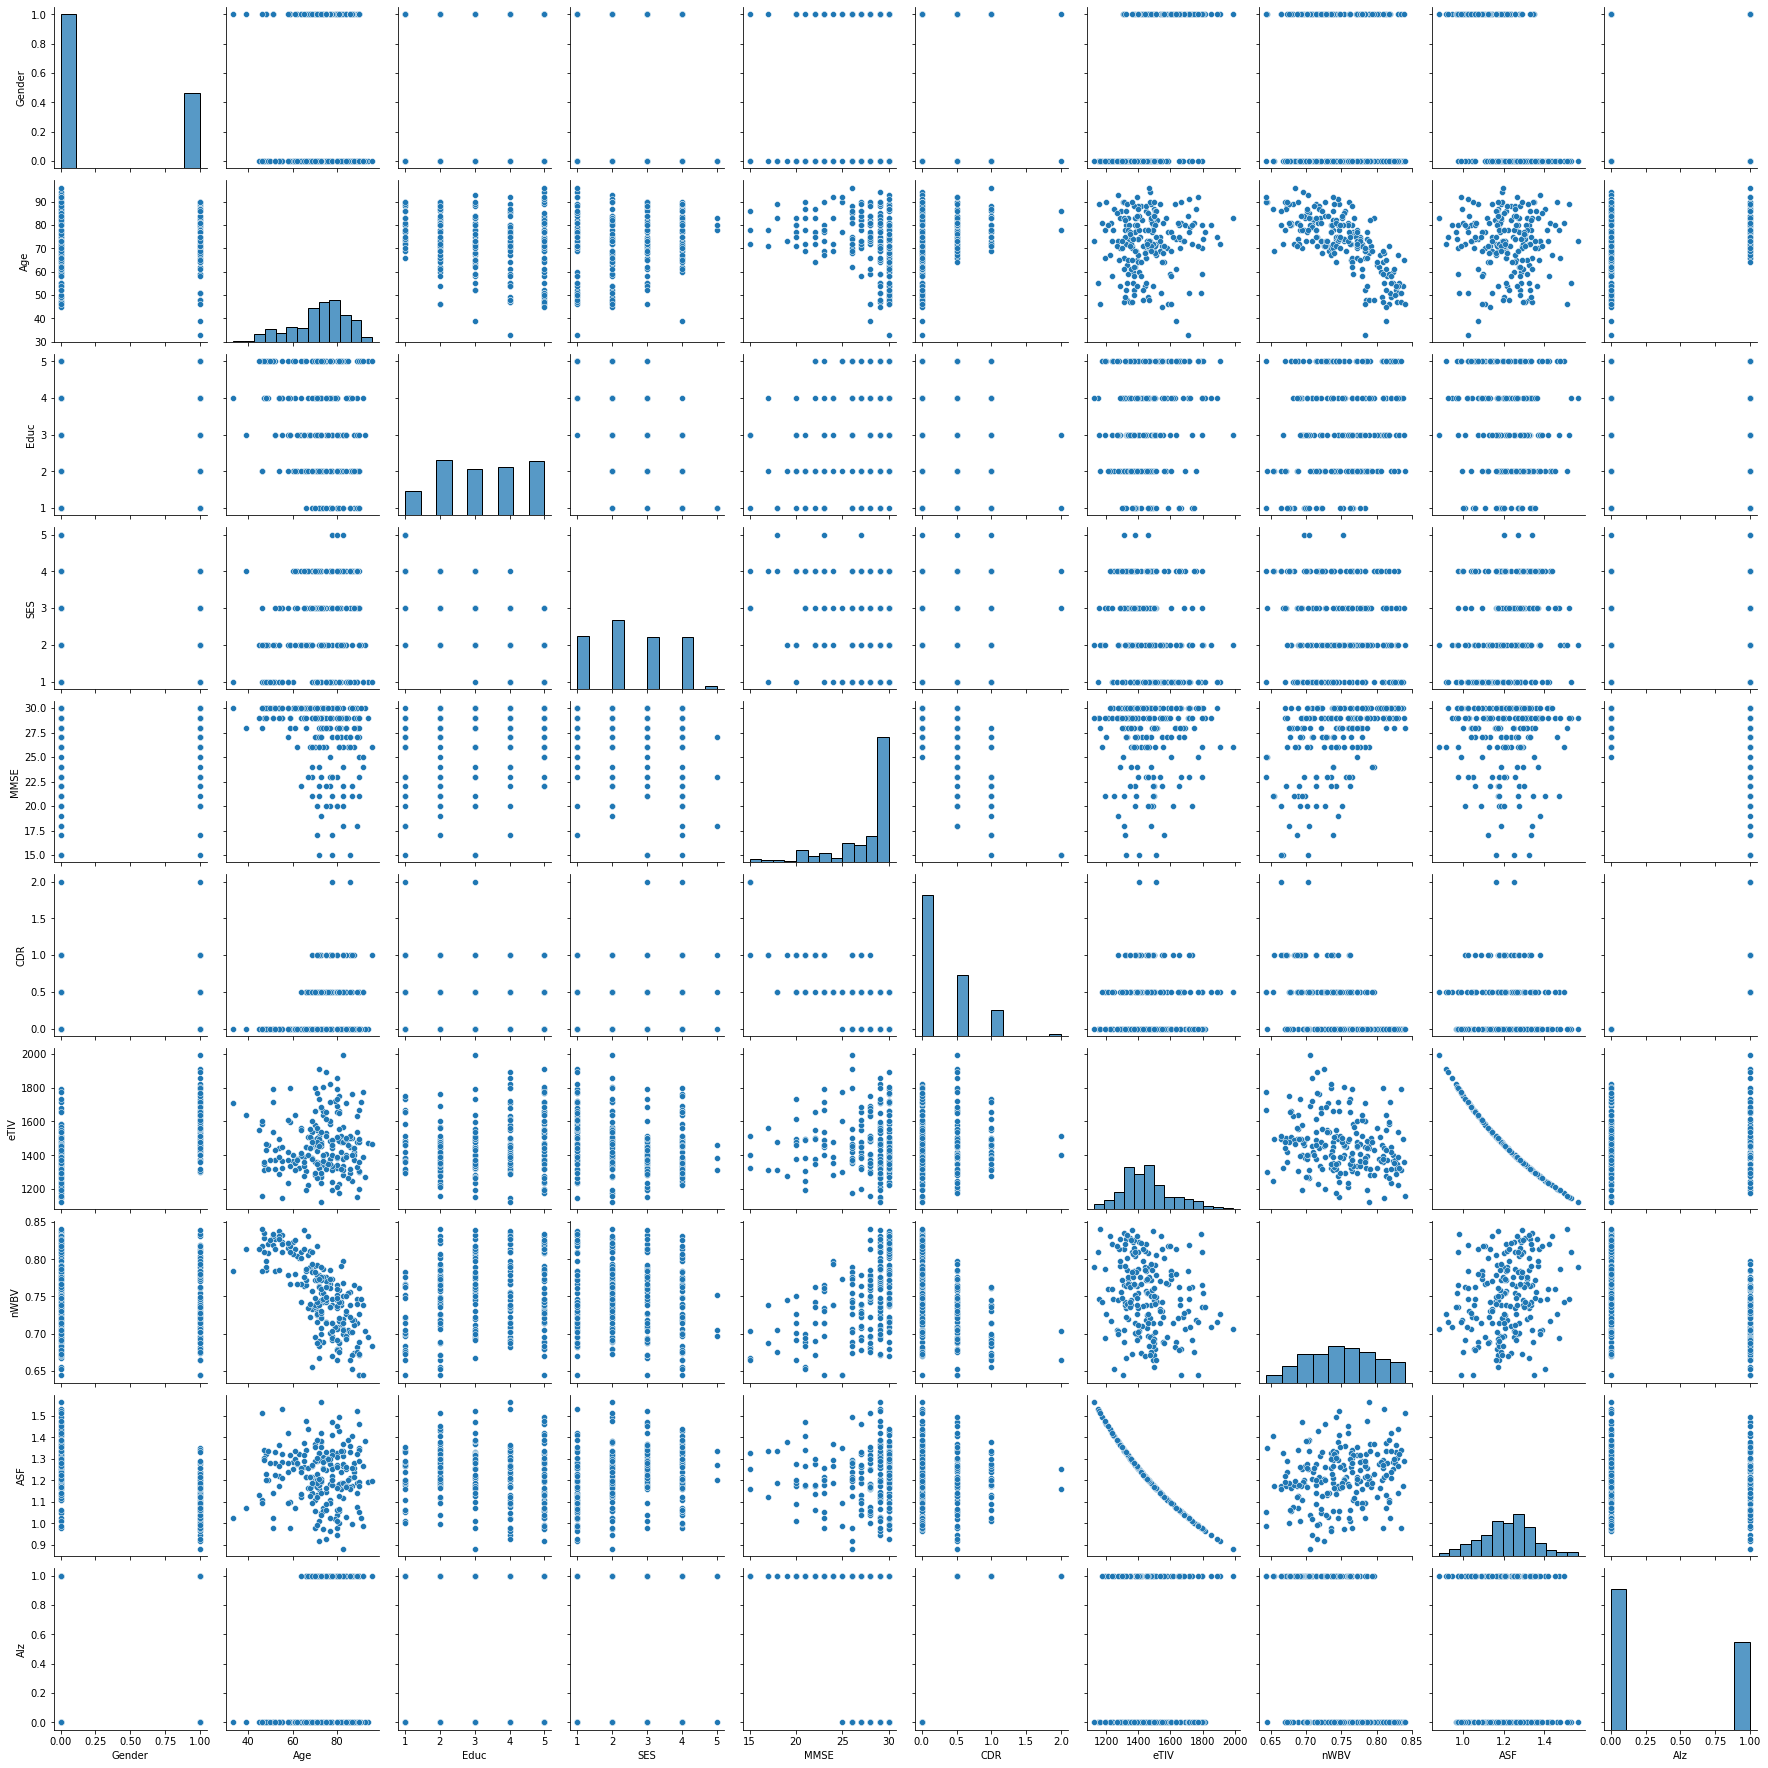

In [212]:
hued = ['2.0', '1.0', '0.5', '0.0']
sns.pairplot(data=df_cross,palette = 'icefire')

Lets take a closer look to some of these relationships.

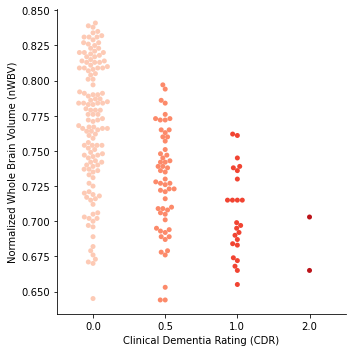

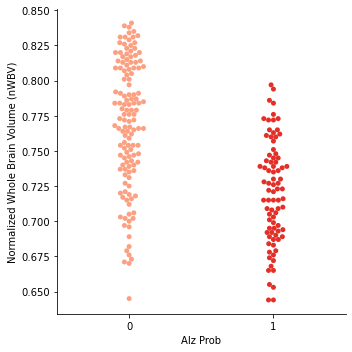

In [213]:


g1 = sns.catplot(kind='swarm', data=df_cross, x='CDR', y = 'nWBV', palette='Reds')
g2 = sns.catplot(kind='swarm', data=df_cross, x='Alz', y = 'nWBV', palette='Reds')

g1.set_xlabels("Clinical Dementia Rating (CDR)")
g1.set_ylabels('Normalized Whole Brain Volume (nWBV)')
g1.set_titles('Distribution of nWBV against CDR')

g2.set_xlabels("Alz Prob")
g2.set_ylabels('Normalized Whole Brain Volume (nWBV)')
g2.set_titles('Distribution of nWBV against CDR')

display(g1)
display(g2)



It looks like the range of nWBV gets smaller as the CDR gets higher. However, the number of observations is small for higher CDR values, so we should be careful when making inferences. The second column in the second figure is the superimposed version of CDR > 0. 

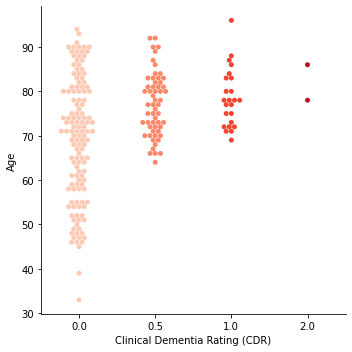

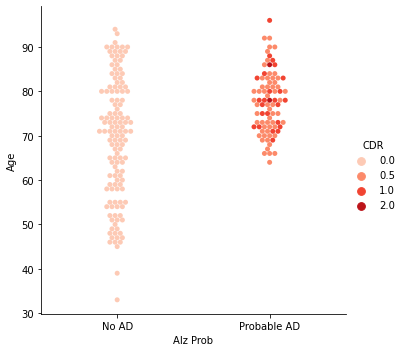

In [214]:

g3 = sns.catplot(data=df_cross,x = 'CDR', y = 'Age', kind = 'swarm', palette='Reds')
g4 = sns.catplot(data=df_cross,x = 'Alz', y = 'Age', hue = 'CDR', palette='Reds', kind = 'swarm')


g3.set_xlabels("Clinical Dementia Rating (CDR)")
g3.set_ylabels('Age')
g3.set_titles('Distribution of nWBV against CDR')

g4.set_xlabels("Alz Prob")
g4.set_ylabels('Age')
g4.set_titles('Distribution of nWBV against CDR')
g4.set_xticklabels(['No AD', 'Probable AD'])



display(g3)
display(g4)

In the first figure, we can see that the age range gets smaller as the CDR gets higher.

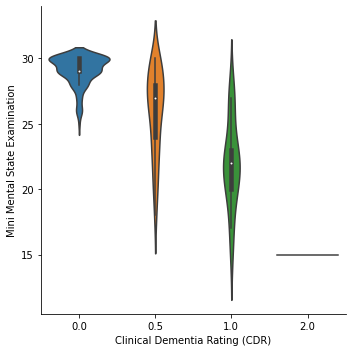

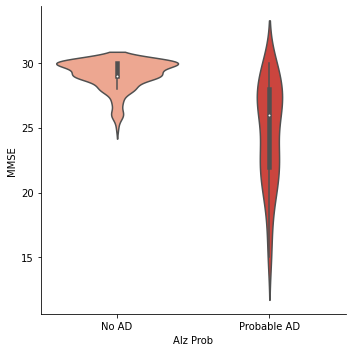

In [215]:

g5 = sns.catplot(data=df_cross,x='CDR',y='MMSE', kind = 'violin')
g6 = sns.catplot(data=df_cross,x='Alz',y='MMSE', kind = 'violin', palette='Reds')

g5.set_xlabels("Clinical Dementia Rating (CDR)")
g5.set_ylabels('Mini Mental State Examination')
g5.set_titles('Distribution of nWBV against CDR')

g6.set_xlabels("Alz Prob")
g6.set_ylabels('MMSE')
g6.set_titles('Distribution of MMSE against Alz')
g6.set_xticklabels(['No AD', 'Probable AD'])

display(g5)
display(g6)

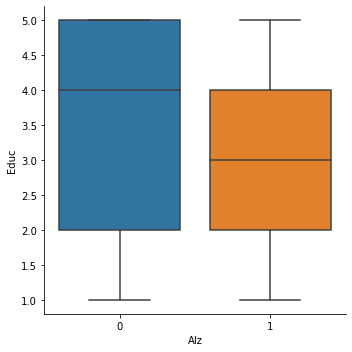

In [216]:
sns.catplot(data=df_cross,x = 'Alz',y = 'Educ', kind='box')

### Descriptive Analysis

In [217]:
df_cross.describe()

,Gender,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Alz
count,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000
mean,0.328704,72.444444,3.231481,2.490741,27.324074,0.261574,1458.638889,0.750500,1.217176,0.384259
std,0.470833,12.306424,1.333689,1.120593,3.436680,0.382593,160.523125,0.048271,0.128858,0.487550
min,0.000000,33.000000,1.000000,1.000000,15.000000,0.000000,1123.000000,0.644000,0.881000,0.000000
25%,0.000000,66.000000,2.000000,2.000000,26.000000,0.000000,1346.000000,0.715000,1.141750,0.000000
50%,0.000000,73.000000,3.000000,2.000000,29.000000,0.000000,1445.500000,0.748500,1.214500,0.000000
75%,1.000000,81.000000,4.000000,3.000000,30.000000,0.500000,1536.500000,0.786000,1.304000,1.000000
max,1.000000,96.000000,5.000000,5.000000,30.000000,2.000000,1992.000000,0.841000,1.563000,1.000000


In [218]:
df_cross.groupby('Alz')['Educ'].value_counts()

Alz  Educ
0    5.0     37
     4.0     30
     2.0     29
     3.0     29
     1.0      8
1    2.0     23
     4.0     16
     1.0     15
     3.0     15
     5.0     14
Name: Educ, dtype: int64

# MODEL

We are going to use the support vector machine (SVM) algorithm to train and predict laalla

In [226]:
encoder = OneHotEncoder(handle_unknown='ignore')

enc_df = pd.DataFrame(encoder.fit_transform(df_cross[['Gender']]).toarray())

model_df = df_cross.join(enc_df)

model_df.columns = ['Gender', 'Age', 'Educ', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF','Alz', 'F', 'M']
model_df

y = model_df['CDR'].values #target values
X = model_df[['Age', 'Educ', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF','F','M' ]] #predictors



TOMORROW: ROBUST SCALING FINISH MODEL